Olympic Athletes

You will be working with a historical dataset on the modern Olympic Games, which includes all the games from Athens 1896 to Rio 2016. The data was scraped from www.sports-reference.com in May 2018.
The dataset athlete_events.csv contains 271’116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event. Can you predict who will win?

The features:
    
    ID - Unique number for each athlete

    Name - Athlete’s name

    Sex - M or F

    Age - Integer

    Height - In centimeters

    Weight - In kilograms

    Team - Team name

    NOC - National Olympic Committee 3-letter code

    Games - Year and season

    Year - Integer

    Season - Summer or Winter

    City - Host city

    Sport - Sport

    Event - Event

    Medal - Gold, Silver, Bronze, or NA

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Magics

In [1]:
# auto reload packages and modules when they are modified
%load_ext autoreload
%autoreload 2
# draw matplotlib plots in line
%matplotlib inline
# enforce PEP 8 code on jupyter lab ...
%load_ext lab_black
# ... or jupyter notebook
# %load_ext nb_black

### Packages

In [2]:
# ----------------------------------GENERAL---------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

from IPython.display import (
    Image,
)  # I-Python For allowing user to display images in notebooks
import seaborn as sns  # Visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt  # Importation of pyplot sub-library from Matplotlib library

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.model_selection import (
    train_test_split,
)  # Importation of Scikit-Learn library focused on Train Test Split method;
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import (
    PowerTransformer,
)  # Will make the probability distribution of a variable more Gaussian-like
from sklearn.preprocessing import RobustScaler
from sklearn.inspection import (
    permutation_importance,
)  # Permutation Importance for feature selection approach
from sklearn.feature_selection import (
    SelectKBest,
    f_classif,
)  # Select K best features for feature selection approach
from fancyimpute import (
    KNN,
    IterativeImputer,
    SimpleFill,
    SoftImpute,
    IterativeSVD,
    MatrixFactorization,
    NuclearNormMinimization,
    BiScaler,
)
import random
import sys
import sklearn.neighbors._base

sys.modules["sklearn.neighbors.base"] = sklearn.neighbors._base
from missingpy import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

### Custom classes and functions

In [3]:
import sys

SCRIPT_DIR = "../src"
sys.path.append(SCRIPT_DIR)

In [4]:
from template_module import my_function_name

### Global Parameters Setting

In [5]:
plt.style.use("seaborn")

### User-Dependent Variables

In [6]:
data_path = "../data/raw/athlete_events.csv"
df_athlete_events = pd.read_csv(data_path)

In [7]:
df_athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
df_athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
# Remove all duplicate rows
df_athlete_events.drop_duplicates()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [10]:
# Remove three columns
df_athlete_events.drop(["ID", "Games", "Event"], axis=1)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976,Winter,Innsbruck,Luge,NaN
271112,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,NaN
271113,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,NaN
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998,Winter,Nagano,Bobsleigh,NaN


In [19]:
df_athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

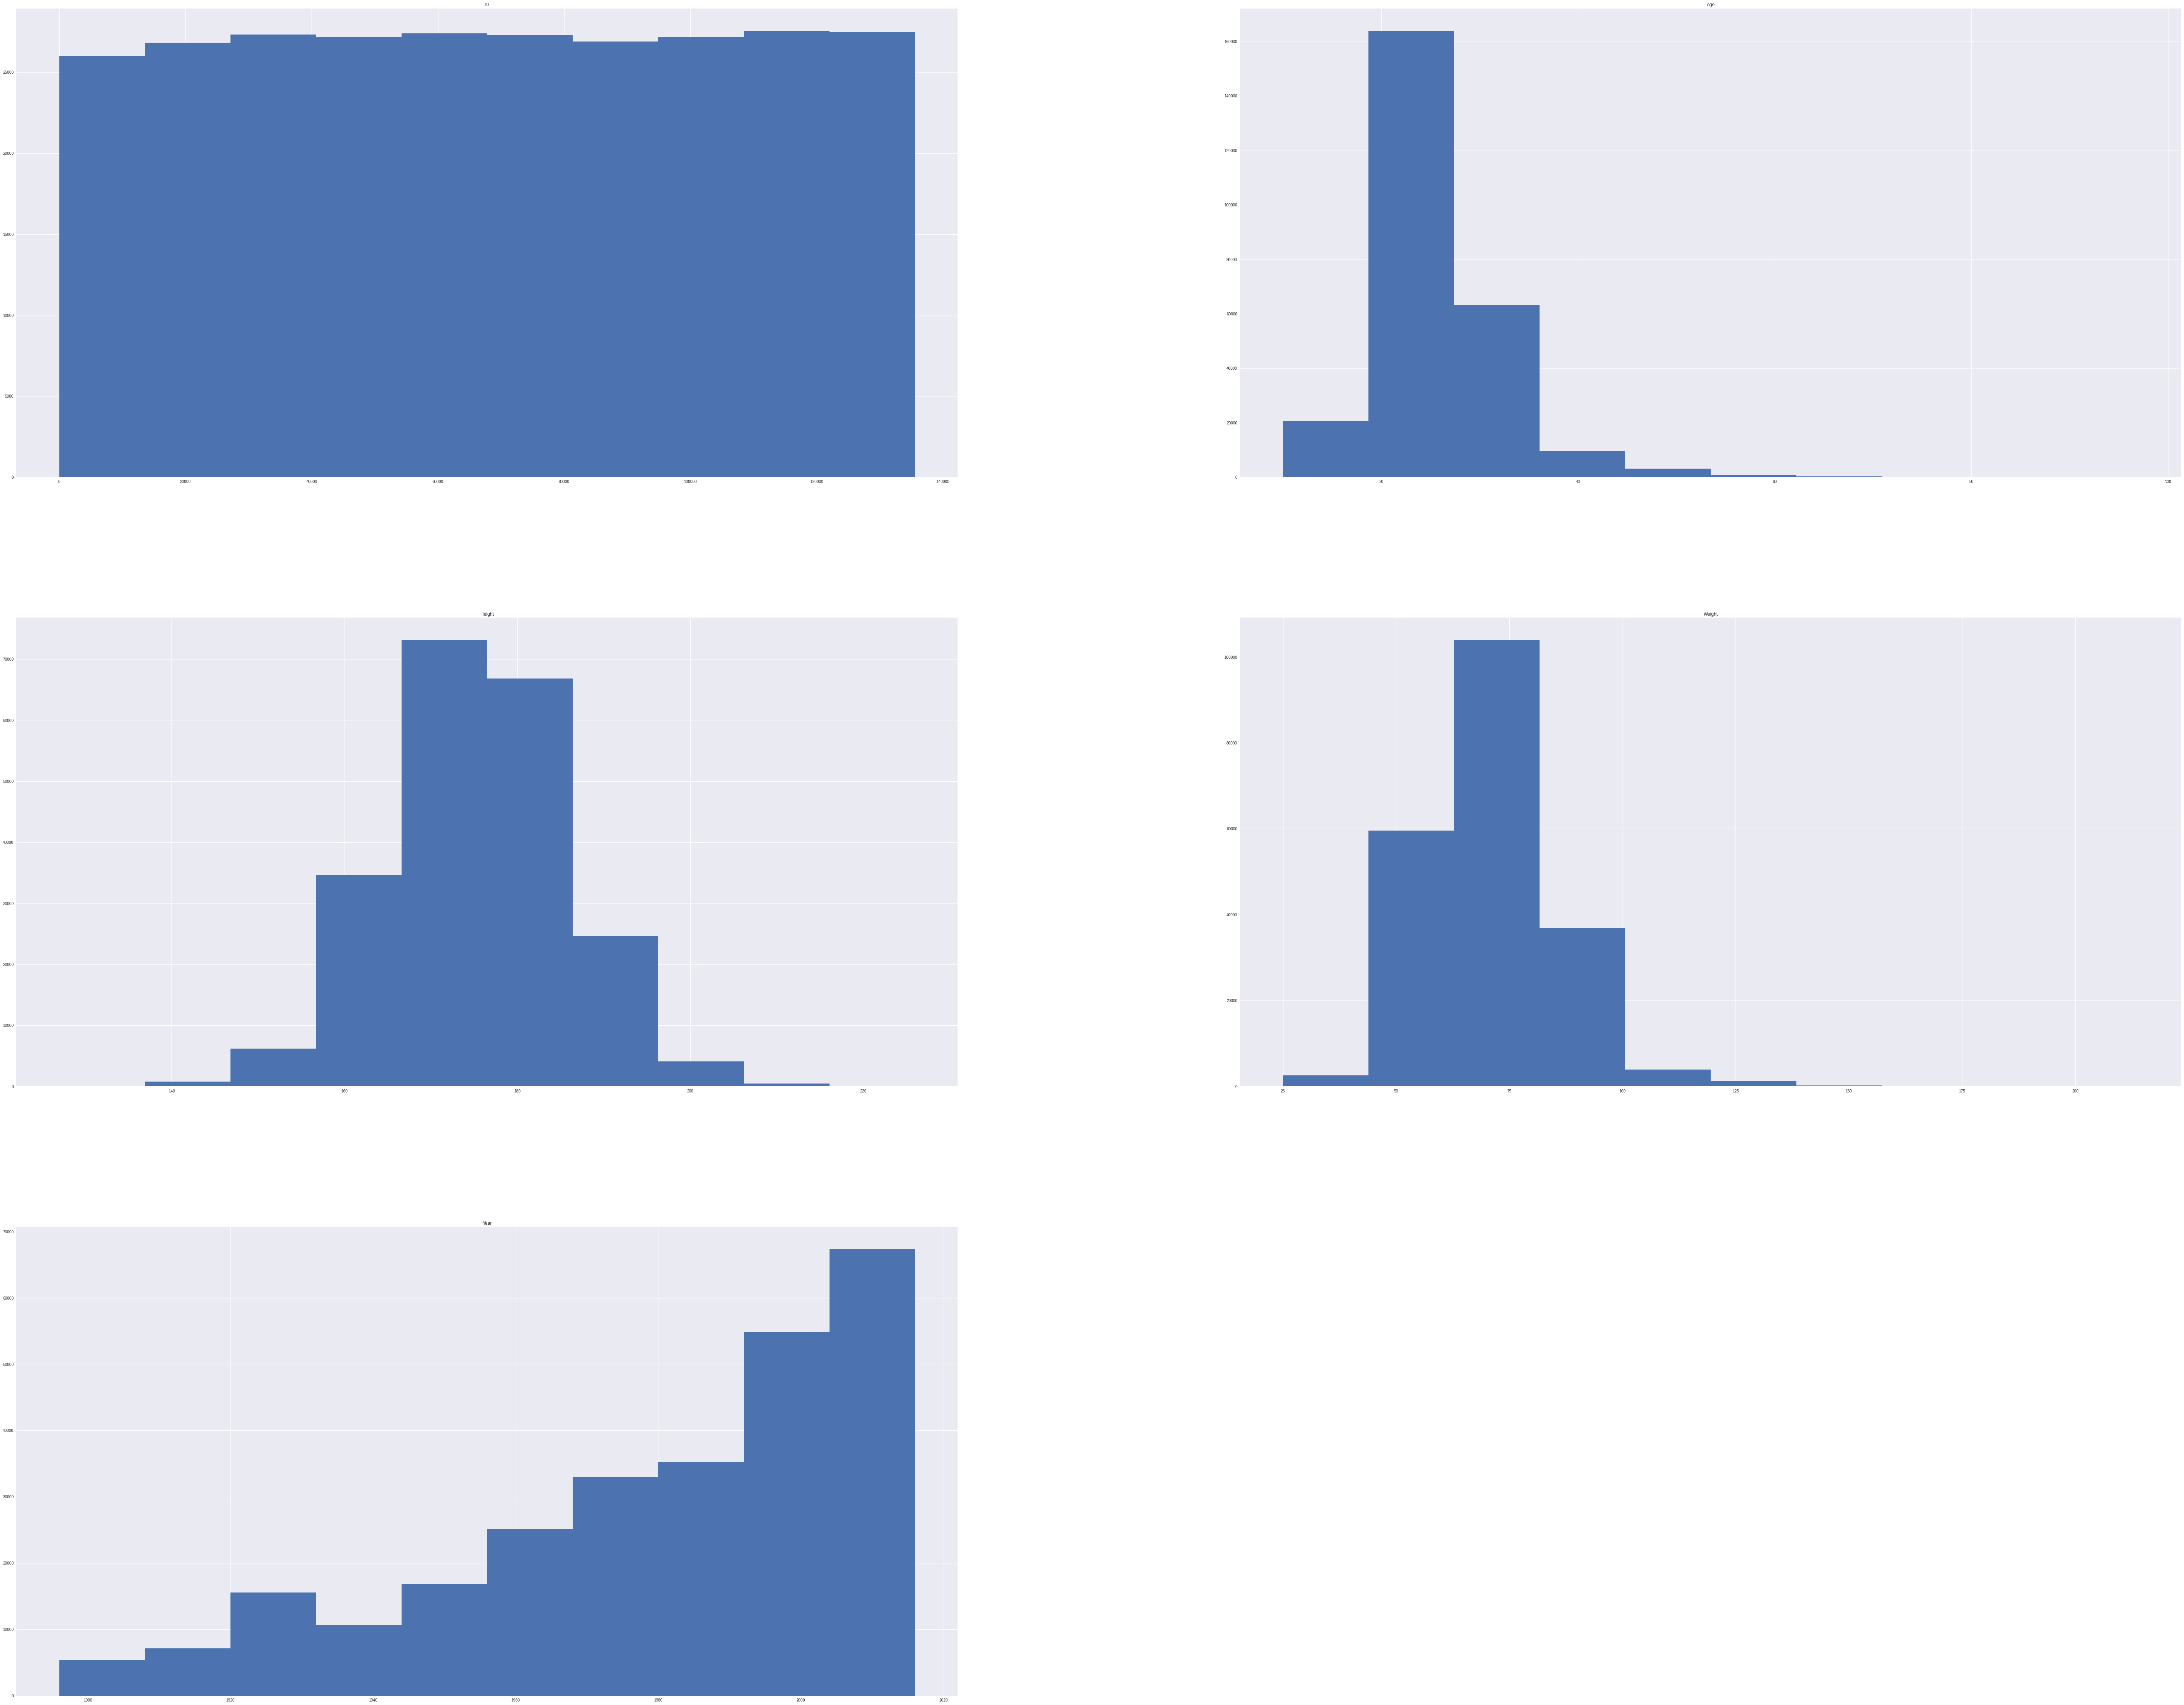

In [17]:
df_athlete_events.hist(figsize=(100, 80))

In [21]:
df_athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [22]:
# Remove two columns name is 'C' and 'D'
df_athlete_events.drop(["ID", "Games", "Event"], axis=1)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976,Winter,Innsbruck,Luge,NaN
271112,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,NaN
271113,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,NaN
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998,Winter,Nagano,Bobsleigh,NaN


<AxesSubplot:>

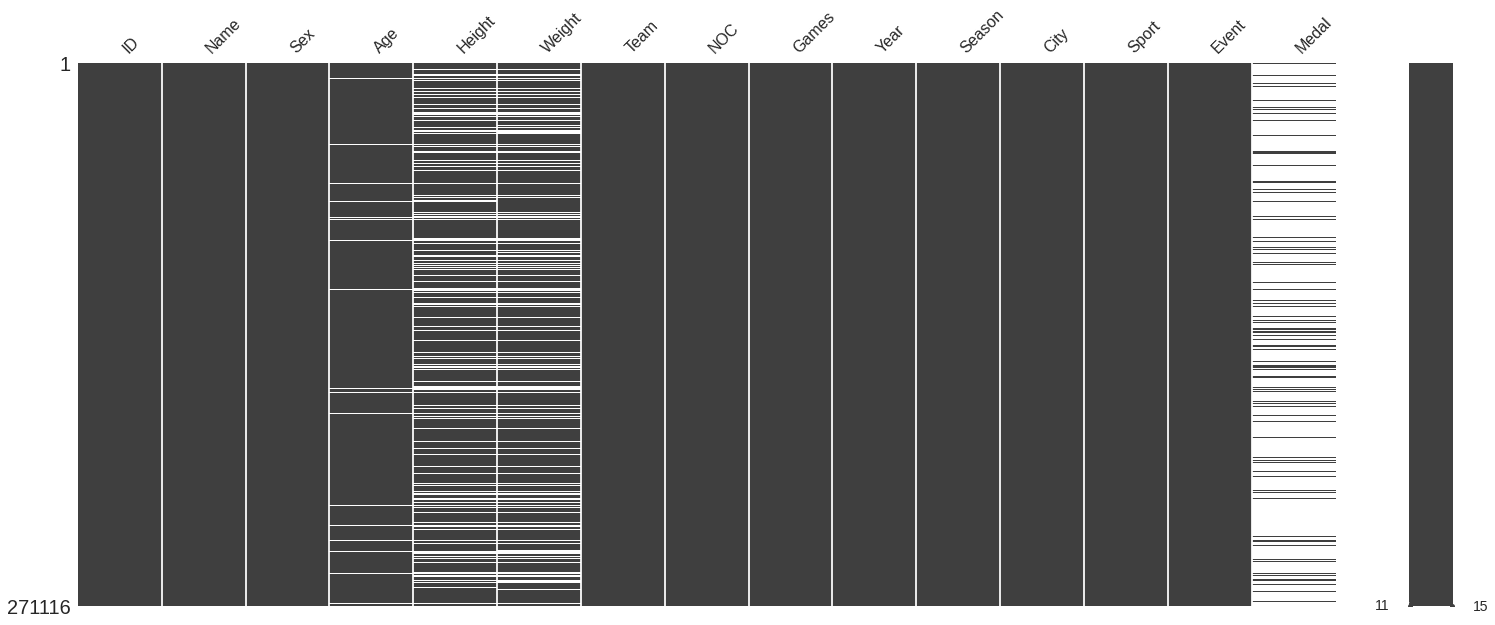

In [24]:
import missingno as msno

msno.matrix(df_athlete_events)

In [25]:
df_athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
import missingno as msno

msno.matrix(df_athlete_events.sort_values("Year", ascending=True))

In [ ]:
msno.heatmap(df_athlete_events)

In [ ]:
df_athlete_events = df_athlete_events.sort_values(by=["Year"])

fontsize = 20

fig, ax = plt.subplots(1, 1, figsize=[20, 14])
msno.matrix(
    df=df_athlete_events,
    ax=ax,
    color=(0.2, 0.2, 0.2),
    sparkline=False,
    fontsize=fontsize,
)

years = list(df_athlete_events["Year"].unique())
ylim_start, ylim_end = ax.get_ylim()
step_size = df_athlete_events.shape[0] / len(years)
_ = ax.yaxis.set_ticks(np.arange(ylim_end, ylim_start, step_size))
_ = ax.yaxis.set_ticklabels(years, fontsize=fontsize)

In [ ]:
df_athlete_events.head()

In [ ]:
df_athlete_events["Height"].isnull().sum()

In [ ]:
df_athlete_events["Age"].isnull().sum()

In [ ]:
df_athlete_events["Weight"].isnull().sum()

In [ ]:
# Construct the pivot table: counted
counted = df_athlete_events.pivot_table(
    index="NOC", columns="Medal", values="Year", aggfunc="count"
)
counted

In [ ]:
# Create the new column: counted['totals']
counted["totals"] = counted.sum(axis="columns")
counted.head()

In [ ]:
# Sort counted by the 'totals' column
counted = counted.sort_values("totals", ascending=False)
counted.head()

In [ ]:
# Create the DataFrame: usa
usa = df_athlete_events[df_athlete_events.NOC == "USA"]

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(["Year", "Medal"])["Sex"].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level="Medal")

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

In [ ]:
gender_counts = df_athlete_events.Sex.value_counts()
gender_counts

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Gender Distribution")
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=180)

In [ ]:
df_athlete_events_h_w = df_athlete_events[
    (df_athlete_events.Age != 0)
    & (df_athlete_events.Height != 0.0)
    & (df_athlete_events.Medal != "None")
    & (df_athlete_events.Season == "Summer")
]
sns.scatterplot(
    x=df_athlete_events_h_w.Age,
    y=df_athlete_events_h_w.Height,
    hue="Sex",
    data=df_athlete_events_h_w,
)
plt.xlabel("Age")
plt.ylabel("Height")

In [ ]:
df_athlete_events_h_w = df_athlete_events[
    (df_athlete_events.Age != 0)
    & (df_athlete_events.Weight != 0.0)
    & (df_athlete_events.Medal != "None")
    & (df_athlete_events.Season == "Summer")
]
sns.scatterplot(
    x=df_athlete_events_h_w.Age,
    y=df_athlete_events_h_w.Weight,
    hue="Sex",
    data=df_athlete_events_h_w,
)
plt.xlabel("Age")
plt.ylabel("Weight")

In [ ]:
df_athlete_events.info()

In [ ]:
df_athlete_events.head(10)

In [ ]:
y_medal = {"Medal": {"Gold": 1, "Silver": 1, "Bronze": 1, "NaN": 0}}
df_athlete_events.replace(y_medal, inplace=True)
df_athlete_events["Medal"] = df_athlete_events["Medal"].fillna(0)

In [ ]:
df_athlete_events.head(10)

In [ ]:
df_athlete_events_impute = df_athlete_events[["Age", "Height", "Weight"]].copy()

In [ ]:
df_athlete_events_impute.head()

In [ ]:
def imputation_methods(train_data, imputer_choice="mice"):
    """list of imputations methods
    to choose from and add explanations
    """
    if imputer_choice == "mice":
        mice_imputer = IterativeImputer()
        train_imputed = mice_imputer.fit_transform(train_data)

    elif imputer_choice == "mice_xgboost":
        mice_xgb_imputer = IterativeImputer(
            estimator=xgb.XGBRegressor(
                n_estimators=5,
                random_state=1,
            ),
            missing_values=np.nan,
            max_iter=5,
            initial_strategy="mean",
            imputation_order="ascending",
            verbose=2,
            random_state=1,
        )
        train_imputed = mice_xgb_imputer.fit_transform(train_data)

    elif imputer_choice == "knn5":
        knn_imputer = KNN(orientation="columns")
        train_imputed = knn_imputer.fit_transform(train_data)

    elif (
        imputer_choice == "knn_imp"
    ):  # missingpy knn imputer https://github.com/epsilon-machine/missingpy
        knn_imputer2 = KNNImputer()
        train_imputed = knn_imputer2.fit_transform(train_data)

    return train_imputed

In [ ]:
df_athlete_events_impute_knn5 = imputation_methods(
    df_athlete_events_impute, imputer_choice="knn5"
)

In [ ]:
df_athlete_events_impute_mice = imputation_methods(
    df_athlete_events_impute, imputer_choice="mice"
)

In [ ]:
df_athlete_events_impute_mice

In [ ]:
def imputation_methods(train_data, test_data, imputer_choice="mice"):
    """list of imputations methods
    to choose from and add explanations
    """
    if imputer_choice == "mice":
        mice_imputer = IterativeImputer()
        train_imputed = mice_imputer.fit_transform(train_data)
        test_imputed = mice_imputer.transform(test_data)

    elif imputer_choice == "mice_xgboost":
        mice_xgb_imputer = IterativeImputer(
            estimator=xgb.XGBRegressor(
                n_estimators=5,
                random_state=1,
            ),
            missing_values=np.nan,
            max_iter=5,
            initial_strategy="mean",
            imputation_order="ascending",
            verbose=2,
            random_state=1,
        )
        train_imputed = mice_xgb_imputer.fit_transform(train_data)
        test_imputed = mice_xgb_imputer.fit_transform(test_data)

    elif imputer_choice == "knn5":
        knn_imputer = KNN(orientation="columns")
        train_imputed = knn_imputer.fit_transform(train_data)
        test_imputed = knn_imputer.fit_transform(test_data)

    elif (
        imputer_choice == "knn_imp"
    ):  # missingpy knn imputer https://github.com/epsilon-machine/missingpy
        knn_imputer2 = KNNImputer()
        train_imputed = knn_imputer2.fit_transform(train_data)
        test_imputed = knn_imputer2.transform(test_data)

    return train_imputed, test_imputed

<a id='CL'></a>
## [Conclusion](#P0)

This is a pre-written conclusion in which we have nice figures.

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>